***Imports***

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# from sklearn import datasets

***Data Loading***

In [2]:
df = pd.read_csv("diabetic_data.csv")
df1 = pd.read_csv("filtered.csv")
df2 = pd.read_csv("filtered_final2.csv")

In [3]:
df1.shape
df1.head(10)

,Unnamed: 0,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,...,level1_diag1_4.0,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,1,149190,55629189,15,-0.444872,0.803605,-0.816784,0.270081,0.881754,0,...,0,0,0,0,0,0,0,1,0,0
1,2,64410,86047875,25,-0.784109,-1.602060,2.026788,-0.335198,-0.704844,0,...,0,0,0,0,0,1,0,0,0,0
2,3,500364,82442376,35,-0.784109,0.051835,-0.248070,0.027969,-0.175978,0,...,0,0,0,0,0,0,0,1,0,0
3,4,16680,42519267,45,-1.123345,0.402661,-0.816784,-0.940477,-1.233711,0,...,0,0,0,0,1,0,0,1,0,0
4,5,35754,82637451,55,-0.444872,-0.599700,2.595502,0.027969,0.881754,0,...,0,0,0,0,0,0,0,1,0,0
5,6,55842,84259809,65,-0.105636,1.354904,-0.248070,0.633248,-0.175978,1,...,0,0,0,0,0,0,0,1,0,0
6,7,63768,114882984,75,0.233600,1.505258,-0.816784,-0.456254,0.352888,0,...,0,0,0,0,0,0,0,1,0,0
7,8,12522,48330783,85,2.947491,1.254668,0.320645,1.480639,0.352888,0,...,0,0,0,0,0,0,0,1,0,0
8,9,15738,63555939,95,2.608255,-0.499463,0.889359,0.270081,0.352888,0,...,0,0,0,0,0,0,0,1,0,0
9,10,28236,89869032,45,1.590546,0.202189,0.320645,0.149025,0.881754,0,...,1,0,0,0,0,1,0,0,0,0


In [4]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'A1Cresult_0', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange']

# 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
#                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0', 'max_glu_serum_1', 'A1Cresult_1'

***Model***


#Logistic Regression

In [5]:
X = df2[feature_set]
y = df2['readmitted']

Class imbalance exists, so we need to over sample with ***SMOTE***

In [6]:
print('Original dataset shape {}'.format(Counter(y)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 41276, 1: 18430})
New dataset shape Counter({1: 41276, 0: 41276})


Re-Training Logistic Regression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1')
logit.fit(X_test, y_test)
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

/share/pkg.7/python3/3.7.3/install/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy is 0.58
Precision is 0.58
Recall is 0.58


In [8]:
accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

#Linear Regression

In [9]:
X = df2[feature_set]
y = df2['readmitted']
df2['readmitted'].value_counts()

0    41276
1    18430
Name: readmitted, dtype: int64

In [10]:
print('Original dataset shape {}'.format(Counter(y)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 41276, 1: 18430})
New dataset shape Counter({1: 41276, 0: 41276})


In [11]:
linit = LinearRegression()
linit.fit(train_input_new, train_output_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
linit_pred = linit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(linit_pred, name = 'Predict'), margins = True)

Predict,0.08411407002651372,0.09017009354756084,0.09744257206804086,0.13245323646324952,0.14643930829774537,0.15282839252008984,0.159664813059763,0.16035940204133206,0.1609616390346999,0.161795950581125,...,0.8749963132102204,0.8763642125519492,0.8929996397847105,0.8972378690077522,0.9116638027175605,0.9135536386961919,0.9244564168247859,0.9574038239007266,0.9691671737012215,All
Actual,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,1,8194
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,8317
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,16511


In [13]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, linit_pred.round())))
print("Precision is {0:.2f}".format(precision_score(y_test, linit_pred.round())))
print("Recall is {0:.2f}".format(recall_score(y_test, linit_pred.round())))

accuracy_linit = accuracy_score(y_test, linit_pred.round())
precision_linit = precision_score(y_test, linit_pred.round())
recall_linit = recall_score(y_test, linit_pred.round())

Accuracy is 0.58
Precision is 0.58
Recall is 0.58


#Decision Tree

In [14]:
feature_set_no_int = [
    'age',
    'time_in_hospital',
    'num_procedures',
    'num_medications',
    'number_outpatient_log1p',
    'number_emergency_log1p',
    'number_inpatient_log1p',
    'number_diagnoses',
    'metformin',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'glimepiride',
    'glipizide',
    'glyburide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    'tolazamide',
    'insulin',
    'glyburide-metformin',
    'AfricanAmerican',
    'Asian',
    'Caucasian',
    'Hispanic',
    'Other',
    'gender_1',
    'admission_type_id_3',
    'admission_type_id_5',
    'discharge_disposition_id_2',
    'discharge_disposition_id_7',
    'discharge_disposition_id_10',
    'discharge_disposition_id_18',
    'admission_source_id_4',
    'admission_source_id_7',
    'admission_source_id_9',
    'max_glu_serum_0',
    'max_glu_serum_1',
    'A1Cresult_0',
    'A1Cresult_1',
    'level1_diag1_1.0',
    'level1_diag1_2.0',
    'level1_diag1_3.0',
    'level1_diag1_4.0',
    'level1_diag1_5.0',
    'level1_diag1_6.0',
    'level1_diag1_7.0',
    'level1_diag1_8.0',
    ]

In [15]:
X = df1[feature_set_no_int]
y = df1['readmitted']
df1['readmitted'].value_counts()

0    54635
1     5071
Name: readmitted, dtype: int64

In [16]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [17]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [18]:
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=28,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10257,679,10936
1,1132,9786,10918
All,11389,10465,21854


In [20]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.92
Precision is 0.94
Recall is 0.90


                       Feature  Importance
8                    metformin    0.022136
26                    gender_1    0.023194
19                     insulin    0.023252
0                          age    0.026777
40            level1_diag1_1.0    0.029663
2               num_procedures    0.043883
3              num_medications    0.048812
7             number_diagnoses    0.077501
29  discharge_disposition_id_2    0.106305
1             time_in_hospital    0.413671


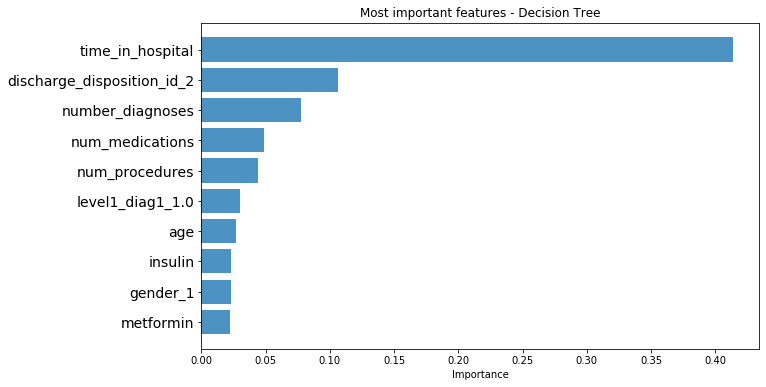

In [21]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

#Random Forest

In [22]:
X = df1[feature_set_no_int]
y = df1['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [23]:
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10788,148,10936
1,1130,9788,10918
All,11918,9936,21854


In [25]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.94
Precision is 0.99
Recall is 0.90


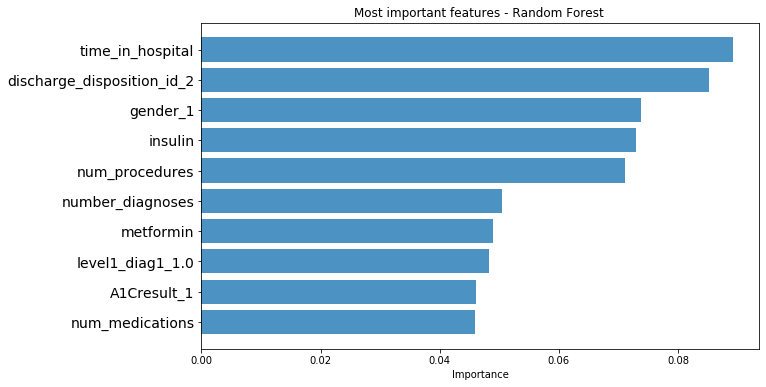

In [26]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

#SVM with RBF Kernel

In [27]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

In [28]:
X = df1[feature_set]
y = df1['readmitted']

In [29]:
# print('Original dataset shape {}'.format(Counter(y)))
# sm = SMOTE(random_state=20)
# train_input_new, train_output_new = sm.fit_sample(X, y)
# print('New dataset shape {}'.format(Counter(train_output_new)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))

In [30]:
# X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
svclassifier = SVC(kernel='rbf')
svclassifier2 = SVC(kernel='sigmoid')

In [31]:
svclassifier.fit(X_train, y_train)
svclassifier2.fit(X_train, y_train)

/share/pkg.7/python3/3.7.3/install/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/share/pkg.7/python3/3.7.3/install/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
svm_pred = svclassifier.predict(X_test)
svm_pred2 = svclassifier2.predict(X_test)

In [33]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(svm_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2112,2,2114
1,247,0,247
All,2359,2,2361


In [34]:
print("RBF accuracy is {0:.2f}".format(accuracy_score(y_test, svm_pred)))
print("RBF precision is {0:.2f}".format(precision_score(y_test, svm_pred)))
print("RBF recall is {0:.2f}".format(recall_score(y_test, svm_pred)))
print("Sigmoid accuracy is {0:.2f}".format(accuracy_score(y_test, svm_pred)))
print("Sigmoid precision is {0:.2f}".format(precision_score(y_test, svm_pred)))
print("Sigmoid recall is {0:.2f}".format(recall_score(y_test, svm_pred)))

accuracy_svm = accuracy_score(y_test, svm_pred)
precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)

accuracy_svm2 = accuracy_score(y_test, svm_pred2)
precision_svm2 = precision_score(y_test, svm_pred2)
recall_svm2 = recall_score(y_test, svm_pred2)

RBF accuracy is 0.91
RBF precision is 0.20
RBF recall is 0.00
Sigmoid accuracy is 0.91
Sigmoid precision is 0.20
Sigmoid recall is 0.00


/share/pkg.7/python3/3.7.3/install/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#Multilayer Perception

In [35]:
X = df1[feature_set]
y = df1['readmitted']

In [36]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 43711, 1: 4053})
New dataset shape Counter({0: 54635, 1: 54635})


In [41]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [42]:
clf.fit(train_input_new, train_output_new)
y_pred = clf.predict(X_test)

Iteration 1, loss = inf
Iteration 2, loss = 0.68405872
Iteration 3, loss = 0.68284806
Iteration 4, loss = 0.68077083
Iteration 5, loss = 0.67982864
Iteration 6, loss = 0.67889114
Iteration 7, loss = 0.67758425
Iteration 8, loss = 0.67688062
Iteration 9, loss = 0.67679185
Iteration 10, loss = 0.67620281
Iteration 11, loss = 0.67592682
Iteration 12, loss = 0.67467737
Iteration 13, loss = 0.67407662
Iteration 14, loss = 0.67390198
Iteration 15, loss = 0.67266991
Iteration 16, loss = 0.67257599
Iteration 17, loss = 0.67156688
Iteration 18, loss = 0.67055515
Iteration 19, loss = 0.66958145
Iteration 20, loss = 0.66904536
Iteration 21, loss = 0.66933833
Iteration 22, loss = 0.66827477
Iteration 23, loss = 0.66756962
Iteration 24, loss = 0.66673642
Iteration 25, loss = 0.66706706
Iteration 26, loss = 0.66608807
Iteration 27, loss = 0.66559241
Iteration 28, loss = 0.66593760
Iteration 29, loss = 0.66486522
Iteration 30, loss = 0.66487088
Iteration 31, loss = 0.66352452
Iteration 32, loss = 0.6

Iteration 253, loss = 0.57060685
Iteration 254, loss = 0.57076359
Iteration 255, loss = 0.57126658
Iteration 256, loss = 0.57202020
Iteration 257, loss = 0.57062584
Iteration 258, loss = 0.56916402
Iteration 259, loss = 0.56919837
Iteration 260, loss = 0.56956956
Iteration 261, loss = 0.56836136
Iteration 262, loss = 0.56875601
Iteration 263, loss = 0.56785716
Iteration 264, loss = 0.56718022
Iteration 265, loss = 0.56718866
Iteration 266, loss = 0.56687864
Iteration 267, loss = 0.56836293
Iteration 268, loss = 0.56536495
Iteration 269, loss = 0.56585395
Iteration 270, loss = 0.56551328
Iteration 271, loss = 0.56656362
Iteration 272, loss = 0.56438277
Iteration 273, loss = 0.56416260
Iteration 274, loss = 0.56388757
Iteration 275, loss = 0.56582233
Iteration 276, loss = 0.56236687
Iteration 277, loss = 0.56463210
Iteration 278, loss = 0.56375031
Iteration 279, loss = 0.56178503
Iteration 280, loss = 0.56267754
Iteration 281, loss = 0.56287067
Iteration 282, loss = 0.56132715
Iteration 

Iteration 502, loss = 0.50594593
Iteration 503, loss = 0.50798288
Iteration 504, loss = 0.50486398
Iteration 505, loss = 0.50331709
Iteration 506, loss = 0.50569193
Iteration 507, loss = 0.50464109
Iteration 508, loss = 0.50527205
Iteration 509, loss = 0.50556806
Iteration 510, loss = 0.50270793
Iteration 511, loss = 0.50307628
Iteration 512, loss = 0.50216321
Iteration 513, loss = 0.50306326
Iteration 514, loss = 0.50371875
Iteration 515, loss = 0.50218391
Iteration 516, loss = 0.50524891
Iteration 517, loss = 0.50090066
Iteration 518, loss = 0.50186457
Iteration 519, loss = 0.50174864
Iteration 520, loss = 0.50190080
Iteration 521, loss = 0.50228021
Iteration 522, loss = 0.50239258
Iteration 523, loss = 0.50129816
Iteration 524, loss = 0.50029640
Iteration 525, loss = 0.49975347
Iteration 526, loss = 0.49926682
Iteration 527, loss = 0.50009639
Iteration 528, loss = 0.49981061
Iteration 529, loss = 0.50084435
Iteration 530, loss = 0.50083577
Iteration 531, loss = 0.49833835
Iteration 

In [43]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

accuracy_mlp = accuracy_score(y_test, y_pred)
precision_mlp = precision_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)

0.7392696989109545
0.7194752774974773
0.783660010991024


#Model Comparison

/share/pkg.7/python3/3.7.3/install/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/share/pkg.7/python3/3.7.3/install/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


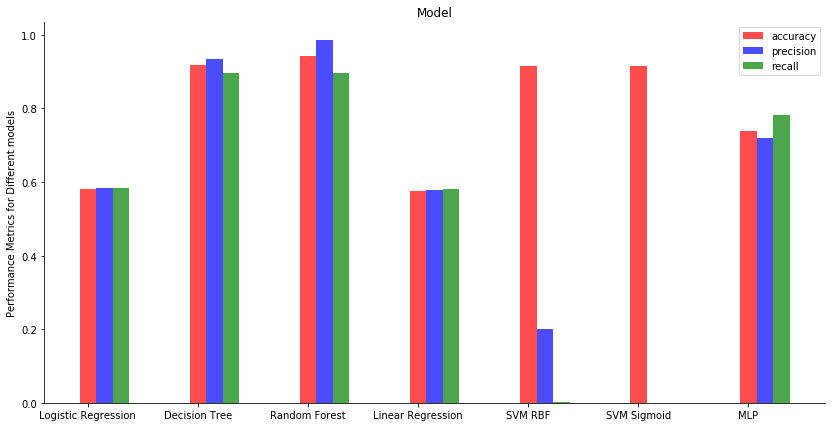

In [44]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Linear Regression', 'SVM RBF', 'SVM Sigmoid', 'MLP']
values = [accuracy_logit, accuracy_dtree, accuracy_rm, accuracy_linit, accuracy_svm, accuracy_svm2, accuracy_mlp]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Linear Regression', 'SVM RBF', 'SVM Sigmoid', 'MLP']
values = [precision_logit, precision_dtree, precision_rm, precision_linit, precision_svm, precision_svm2, precision_mlp]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Linear Regression' , 'SVM RBF', 'SVM Sigmoid', 'MLP']
values = [recall_logit, recall_dtree, recall_rm, recall_linit, recall_svm, recall_svm2, recall_mlp]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()